In [2]:
import pandas as pd
import numpy as np

In [43]:
sensores = pd.read_csv("sensor_base.csv")
arribos = pd.read_csv("abreojos_langosta.csv")
arribos.drop("Unnamed: 0",axis=1,inplace=True)
arribos.rename(columns={"FECHA AVISO":"time","PESO DESEMBARCADO":"lobster"},inplace=True)


In [16]:
sensores.shape

(5987, 13)

In [44]:
sensores["time"] = pd.to_datetime(sensores["time"])
arribos["time"] = pd.to_datetime(arribos["time"])

In [50]:
sensores["week"] = sensores["time"].dt.isocalendar().week
arribos["week"] = arribos["time"].dt.isocalendar().week
sensores["month"] = sensores["time"].dt.month
arribos["month"] = arribos["time"].dt.month
sensores["year"] = sensores["time"].dt.isocalendar().year
arribos["year"] = arribos["time"].dt.isocalendar().year

In [38]:
sensores.set_index("time",inplace=True)
arribos.set_index("time",inplace=True)

In [88]:
START_DATE = min(sensores["time"])+timedelta(weeks=104)
END_DATE = pd.to_datetime("2018-09-30")

In [60]:
CUT_DATE

Timestamp('2018-09-30 00:00:00')

In [175]:
from datetime import datetime, timedelta   

def create_dataset(variables,responses,prediction_horizon,START_DATE,END_DATE):
    
    current_date = END_DATE - timedelta(weeks=prediction_horizon)
    X = []
    y = []
    while current_date-timedelta(weeks=104) > START_DATE:
        
        
        seq = create_vectors(variables,responses,current_date)
        target = create_response(responses,prediction_horizon,current_date)
        
        X.append(seq)
        y.append(target)
        
        
        current_date = current_date - timedelta(weeks=1)
    
    X = np.array(X).astype('float32')
    y = np.array(y).astype('float32')
    return X,y
    
def create_response(responses,prediction_horizon,current_date):
    return responses.loc[current_date+timedelta(weeks=1):current_date+timedelta(weeks=prediction_horizon),"lobster"].sum()

def create_vectors(dataframe,responses,current_date):
    #Previous month
    mes = np.array(dataframe.loc[current_date-timedelta(weeks=4):current_date,:])
    seis_antes = np.array(dataframe.loc[current_date-timedelta(weeks=7*4):current_date-timedelta(weeks=6*4),:])
    ano_anterior = np.array(dataframe.loc[current_date-timedelta(weeks=12*4):current_date-timedelta(weeks=11*4),:])
    ano_medio_anterior = np.array(dataframe.loc[current_date-timedelta(weeks=18*4):current_date-timedelta(weeks=17*4),:])
    grupos = [ano_medio_anterior,ano_anterior,seis_antes,mes]
    
    
    return np.vstack(grupos)
    

In [176]:
X,y = create_dataset(sensores2,arribos2,30,START_DATE,END_DATE)

In [177]:
X.shape

(375, 116, 15)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [178]:
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')



In [184]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [187]:

# Train the model
history = model.fit(X, y, epochs=5_000, batch_size=16, verbose=1,validation_split=0.05,
                   callbacks=[callback])


Epoch 1/5000
23/23 [==============================] - 1s 29ms/step - loss: 13552347136.0000 - val_loss: 6113474048.0000
Epoch 2/5000
23/23 [==============================] - 1s 39ms/step - loss: 13552295936.0000 - val_loss: 6113444352.0000
Epoch 3/5000
23/23 [==============================] - 1s 29ms/step - loss: 13552242688.0000 - val_loss: 6113415168.0000
Epoch 4/5000
23/23 [==============================] - 1s 28ms/step - loss: 13552192512.0000 - val_loss: 6113384960.0000
Epoch 5/5000
23/23 [==============================] - 1s 28ms/step - loss: 13552143360.0000 - val_loss: 6113355264.0000
Epoch 6/5000
23/23 [==============================] - 1s 28ms/step - loss: 13552091136.0000 - val_loss: 6113327104.0000
Epoch 7/5000
23/23 [==============================] - 1s 28ms/step - loss: 13552040960.0000 - val_loss: 6113295360.0000
Epoch 8/5000
23/23 [==============================] - 1s 28ms/step - loss: 13551988736.0000 - val_loss: 6113266688.0000
Epoch 9/5000
23/23 [====================

Epoch 69/5000
23/23 [==============================] - 1s 26ms/step - loss: 13548872704.0000 - val_loss: 6111456768.0000
Epoch 70/5000
23/23 [==============================] - 1s 28ms/step - loss: 13548819456.0000 - val_loss: 6111426560.0000
Epoch 71/5000
23/23 [==============================] - 1s 26ms/step - loss: 13548768256.0000 - val_loss: 6111397376.0000
Epoch 72/5000
23/23 [==============================] - 1s 26ms/step - loss: 13548717056.0000 - val_loss: 6111368704.0000
Epoch 73/5000
23/23 [==============================] - 1s 26ms/step - loss: 13548666880.0000 - val_loss: 6111337984.0000
Epoch 74/5000
23/23 [==============================] - 1s 27ms/step - loss: 13548614656.0000 - val_loss: 6111308288.0000
Epoch 75/5000
23/23 [==============================] - 1s 26ms/step - loss: 13548566528.0000 - val_loss: 6111278080.0000
Epoch 76/5000
23/23 [==============================] - 1s 27ms/step - loss: 13548513280.0000 - val_loss: 6111249920.0000
Epoch 77/5000
23/23 [===========

23/23 [==============================] - 1s 26ms/step - loss: 13545450496.0000 - val_loss: 6109470720.0000
Epoch 137/5000
23/23 [==============================] - 1s 26ms/step - loss: 13545397248.0000 - val_loss: 6109442048.0000
Epoch 138/5000
23/23 [==============================] - 1s 27ms/step - loss: 13545346048.0000 - val_loss: 6109411840.0000
Epoch 139/5000
23/23 [==============================] - 1s 26ms/step - loss: 13545292800.0000 - val_loss: 6109382144.0000
Epoch 140/5000
23/23 [==============================] - 1s 28ms/step - loss: 13545242624.0000 - val_loss: 6109350912.0000
Epoch 141/5000
23/23 [==============================] - 1s 26ms/step - loss: 13545191424.0000 - val_loss: 6109321728.0000
Epoch 142/5000
23/23 [==============================] - 1s 26ms/step - loss: 13545142272.0000 - val_loss: 6109292032.0000
Epoch 143/5000
23/23 [==============================] - 1s 27ms/step - loss: 13545088000.0000 - val_loss: 6109261824.0000
Epoch 144/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13542019072.0000 - val_loss: 6107481088.0000
Epoch 204/5000
23/23 [==============================] - 1s 26ms/step - loss: 13541968896.0000 - val_loss: 6107451392.0000
Epoch 205/5000
23/23 [==============================] - 1s 26ms/step - loss: 13541917696.0000 - val_loss: 6107421696.0000
Epoch 206/5000
23/23 [==============================] - 1s 26ms/step - loss: 13541867520.0000 - val_loss: 6107391488.0000
Epoch 207/5000
23/23 [==============================] - 1s 28ms/step - loss: 13541815296.0000 - val_loss: 6107361792.0000
Epoch 208/5000
23/23 [==============================] - 1s 26ms/step - loss: 13541764096.0000 - val_loss: 6107332608.0000
Epoch 209/5000
23/23 [==============================] - 1s 26ms/step - loss: 13541712896.0000 - val_loss: 6107303424.0000
Epoch 210/5000
23/23 [==============================] - 1s 29ms/step - loss: 13541662720.0000 - val_loss: 6107272704.0000
Epoch 211/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13538608128.0000 - val_loss: 6105499648.0000
Epoch 271/5000
23/23 [==============================] - 1s 26ms/step - loss: 13538556928.0000 - val_loss: 6105471488.0000
Epoch 272/5000
23/23 [==============================] - 1s 26ms/step - loss: 13538504704.0000 - val_loss: 6105441792.0000
Epoch 273/5000
23/23 [==============================] - 1s 27ms/step - loss: 13538453504.0000 - val_loss: 6105411584.0000
Epoch 274/5000
23/23 [==============================] - 1s 27ms/step - loss: 13538403328.0000 - val_loss: 6105382912.0000
Epoch 275/5000
23/23 [==============================] - 1s 26ms/step - loss: 13538352128.0000 - val_loss: 6105352704.0000
Epoch 276/5000
23/23 [==============================] - 1s 27ms/step - loss: 13538301952.0000 - val_loss: 6105324544.0000
Epoch 277/5000
23/23 [==============================] - 1s 27ms/step - loss: 13538251776.0000 - val_loss: 6105294336.0000
Epoch 278/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13535180800.0000 - val_loss: 6103513600.0000
Epoch 338/5000
23/23 [==============================] - 1s 27ms/step - loss: 13535129600.0000 - val_loss: 6103483392.0000
Epoch 339/5000
23/23 [==============================] - 1s 27ms/step - loss: 13535080448.0000 - val_loss: 6103453696.0000
Epoch 340/5000
23/23 [==============================] - 1s 26ms/step - loss: 13535029248.0000 - val_loss: 6103424512.0000
Epoch 341/5000
23/23 [==============================] - 1s 28ms/step - loss: 13534978048.0000 - val_loss: 6103394816.0000
Epoch 342/5000
23/23 [==============================] - 1s 30ms/step - loss: 13534927872.0000 - val_loss: 6103365632.0000
Epoch 343/5000
23/23 [==============================] - 1s 29ms/step - loss: 13534874624.0000 - val_loss: 6103335424.0000
Epoch 344/5000
23/23 [==============================] - 1s 30ms/step - loss: 13534823424.0000 - val_loss: 6103306240.0000
Epoch 345/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13531759616.0000 - val_loss: 6101528576.0000
Epoch 405/5000
23/23 [==============================] - 1s 27ms/step - loss: 13531708416.0000 - val_loss: 6101498368.0000
Epoch 406/5000
23/23 [==============================] - 1s 26ms/step - loss: 13531657216.0000 - val_loss: 6101468160.0000
Epoch 407/5000
23/23 [==============================] - 1s 27ms/step - loss: 13531603968.0000 - val_loss: 6101438976.0000
Epoch 408/5000
23/23 [==============================] - 1s 27ms/step - loss: 13531553792.0000 - val_loss: 6101409280.0000
Epoch 409/5000
23/23 [==============================] - 1s 26ms/step - loss: 13531504640.0000 - val_loss: 6101379584.0000
Epoch 410/5000
23/23 [==============================] - 1s 27ms/step - loss: 13531455488.0000 - val_loss: 6101350400.0000
Epoch 411/5000
23/23 [==============================] - 1s 26ms/step - loss: 13531400192.0000 - val_loss: 6101320192.0000
Epoch 412/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13528337408.0000 - val_loss: 6099542528.0000
Epoch 472/5000
23/23 [==============================] - 1s 26ms/step - loss: 13528286208.0000 - val_loss: 6099513344.0000
Epoch 473/5000
23/23 [==============================] - 1s 26ms/step - loss: 13528236032.0000 - val_loss: 6099483648.0000
Epoch 474/5000
23/23 [==============================] - 1s 26ms/step - loss: 13528182784.0000 - val_loss: 6099454464.0000
Epoch 475/5000
23/23 [==============================] - 1s 27ms/step - loss: 13528133632.0000 - val_loss: 6099425280.0000
Epoch 476/5000
23/23 [==============================] - 1s 29ms/step - loss: 13528081408.0000 - val_loss: 6099395072.0000
Epoch 477/5000
23/23 [==============================] - 1s 26ms/step - loss: 13528032256.0000 - val_loss: 6099365888.0000
Epoch 478/5000
23/23 [==============================] - 1s 27ms/step - loss: 13527976960.0000 - val_loss: 6099334656.0000
Epoch 479/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13524914176.0000 - val_loss: 6097560064.0000
Epoch 539/5000
23/23 [==============================] - 1s 26ms/step - loss: 13524866048.0000 - val_loss: 6097530368.0000
Epoch 540/5000
23/23 [==============================] - 1s 27ms/step - loss: 13524814848.0000 - val_loss: 6097499136.0000
Epoch 541/5000
23/23 [==============================] - 1s 26ms/step - loss: 13524759552.0000 - val_loss: 6097470464.0000
Epoch 542/5000
23/23 [==============================] - 1s 26ms/step - loss: 13524710400.0000 - val_loss: 6097440256.0000
Epoch 543/5000
23/23 [==============================] - 1s 27ms/step - loss: 13524658176.0000 - val_loss: 6097411072.0000
Epoch 544/5000
23/23 [==============================] - 1s 27ms/step - loss: 13524608000.0000 - val_loss: 6097382400.0000
Epoch 545/5000
23/23 [==============================] - 1s 27ms/step - loss: 13524557824.0000 - val_loss: 6097351680.0000
Epoch 546/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13521494016.0000 - val_loss: 6095575040.0000
Epoch 606/5000
23/23 [==============================] - 1s 27ms/step - loss: 13521443840.0000 - val_loss: 6095545344.0000
Epoch 607/5000
23/23 [==============================] - 1s 27ms/step - loss: 13521390592.0000 - val_loss: 6095515136.0000
Epoch 608/5000
23/23 [==============================] - 1s 27ms/step - loss: 13521341440.0000 - val_loss: 6095486976.0000
Epoch 609/5000
23/23 [==============================] - 1s 27ms/step - loss: 13521290240.0000 - val_loss: 6095456768.0000
Epoch 610/5000
23/23 [==============================] - 1s 27ms/step - loss: 13521239040.0000 - val_loss: 6095427072.0000
Epoch 611/5000
23/23 [==============================] - 1s 27ms/step - loss: 13521188864.0000 - val_loss: 6095396864.0000
Epoch 612/5000
23/23 [==============================] - 1s 27ms/step - loss: 13521135616.0000 - val_loss: 6095367168.0000
Epoch 613/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13518072832.0000 - val_loss: 6093590528.0000
Epoch 673/5000
23/23 [==============================] - 1s 26ms/step - loss: 13518019584.0000 - val_loss: 6093560320.0000
Epoch 674/5000
23/23 [==============================] - 1s 27ms/step - loss: 13517969408.0000 - val_loss: 6093531648.0000
Epoch 675/5000
23/23 [==============================] - 1s 26ms/step - loss: 13517918208.0000 - val_loss: 6093501952.0000
Epoch 676/5000
23/23 [==============================] - 1s 26ms/step - loss: 13517865984.0000 - val_loss: 6093472768.0000
Epoch 677/5000
23/23 [==============================] - 1s 26ms/step - loss: 13517817856.0000 - val_loss: 6093442560.0000
Epoch 678/5000
23/23 [==============================] - 1s 27ms/step - loss: 13517764608.0000 - val_loss: 6093412864.0000
Epoch 679/5000
23/23 [==============================] - 1s 27ms/step - loss: 13517714432.0000 - val_loss: 6093384192.0000
Epoch 680/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13514654720.0000 - val_loss: 6091609088.0000
Epoch 740/5000
23/23 [==============================] - 1s 26ms/step - loss: 13514601472.0000 - val_loss: 6091578880.0000
Epoch 741/5000
23/23 [==============================] - 1s 26ms/step - loss: 13514548224.0000 - val_loss: 6091549696.0000
Epoch 742/5000
23/23 [==============================] - 1s 26ms/step - loss: 13514498048.0000 - val_loss: 6091520000.0000
Epoch 743/5000
23/23 [==============================] - 1s 27ms/step - loss: 13514446848.0000 - val_loss: 6091490304.0000
Epoch 744/5000
23/23 [==============================] - 1s 28ms/step - loss: 13514397696.0000 - val_loss: 6091460608.0000
Epoch 745/5000
23/23 [==============================] - 1s 27ms/step - loss: 13514346496.0000 - val_loss: 6091430912.0000
Epoch 746/5000
23/23 [==============================] - 1s 26ms/step - loss: 13514295296.0000 - val_loss: 6091401216.0000
Epoch 747/5000
23/23 [=================

23/23 [==============================] - 1s 26ms/step - loss: 13511238656.0000 - val_loss: 6089630208.0000
Epoch 807/5000
23/23 [==============================] - 1s 27ms/step - loss: 13511187456.0000 - val_loss: 6089601536.0000
Epoch 808/5000
23/23 [==============================] - 1s 26ms/step - loss: 13511139328.0000 - val_loss: 6089571328.0000
Epoch 809/5000
23/23 [==============================] - 1s 27ms/step - loss: 13511086080.0000 - val_loss: 6089542656.0000
Epoch 810/5000
23/23 [==============================] - 1s 27ms/step - loss: 13511035904.0000 - val_loss: 6089512448.0000
Epoch 811/5000
23/23 [==============================] - 1s 26ms/step - loss: 13510982656.0000 - val_loss: 6089483264.0000
Epoch 812/5000
23/23 [==============================] - 1s 27ms/step - loss: 13510932480.0000 - val_loss: 6089453568.0000
Epoch 813/5000
23/23 [==============================] - 1s 27ms/step - loss: 13510881280.0000 - val_loss: 6089423360.0000
Epoch 814/5000
23/23 [=================

23/23 [==============================] - 1s 26ms/step - loss: 13507817472.0000 - val_loss: 6087649280.0000
Epoch 874/5000
23/23 [==============================] - 1s 27ms/step - loss: 13507768320.0000 - val_loss: 6087618560.0000
Epoch 875/5000
23/23 [==============================] - 1s 27ms/step - loss: 13507716096.0000 - val_loss: 6087588352.0000
Epoch 876/5000
23/23 [==============================] - 1s 27ms/step - loss: 13507662848.0000 - val_loss: 6087560192.0000
Epoch 877/5000
23/23 [==============================] - 1s 26ms/step - loss: 13507615744.0000 - val_loss: 6087530496.0000
Epoch 878/5000
23/23 [==============================] - 1s 26ms/step - loss: 13507564544.0000 - val_loss: 6087500288.0000
Epoch 879/5000
23/23 [==============================] - 1s 26ms/step - loss: 13507513344.0000 - val_loss: 6087470080.0000
Epoch 880/5000
23/23 [==============================] - 1s 26ms/step - loss: 13507461120.0000 - val_loss: 6087441408.0000
Epoch 881/5000
23/23 [=================

23/23 [==============================] - 1s 27ms/step - loss: 13504402432.0000 - val_loss: 6085669888.0000
Epoch 941/5000
23/23 [==============================] - 1s 27ms/step - loss: 13504352256.0000 - val_loss: 6085639168.0000
Epoch 942/5000
23/23 [==============================] - 1s 26ms/step - loss: 13504302080.0000 - val_loss: 6085609984.0000
Epoch 943/5000
23/23 [==============================] - 1s 26ms/step - loss: 13504250880.0000 - val_loss: 6085579776.0000
Epoch 944/5000
23/23 [==============================] - 1s 26ms/step - loss: 13504197632.0000 - val_loss: 6085551616.0000
Epoch 945/5000
23/23 [==============================] - 1s 27ms/step - loss: 13504149504.0000 - val_loss: 6085521408.0000
Epoch 946/5000
23/23 [==============================] - 1s 26ms/step - loss: 13504096256.0000 - val_loss: 6085491712.0000
Epoch 947/5000
23/23 [==============================] - 1s 26ms/step - loss: 13504046080.0000 - val_loss: 6085461504.0000
Epoch 948/5000
23/23 [=================

23/23 [==============================] - 1s 26ms/step - loss: 13500983296.0000 - val_loss: 6083686912.0000
Epoch 1008/5000
23/23 [==============================] - 1s 27ms/step - loss: 13500931072.0000 - val_loss: 6083657216.0000
Epoch 1009/5000
23/23 [==============================] - 1s 27ms/step - loss: 13500880896.0000 - val_loss: 6083627008.0000
Epoch 1010/5000
23/23 [==============================] - 1s 27ms/step - loss: 13500828672.0000 - val_loss: 6083597824.0000
Epoch 1011/5000
23/23 [==============================] - 1s 27ms/step - loss: 13500779520.0000 - val_loss: 6083569152.0000
Epoch 1012/5000
23/23 [==============================] - 1s 26ms/step - loss: 13500728320.0000 - val_loss: 6083538944.0000
Epoch 1013/5000
23/23 [==============================] - 1s 26ms/step - loss: 13500677120.0000 - val_loss: 6083509760.0000
Epoch 1014/5000
23/23 [==============================] - 1s 26ms/step - loss: 13500624896.0000 - val_loss: 6083480064.0000
Epoch 1015/5000
23/23 [=========

Epoch 1074/5000
23/23 [==============================] - 1s 27ms/step - loss: 13497573376.0000 - val_loss: 6081711616.0000
Epoch 1075/5000
23/23 [==============================] - 1s 26ms/step - loss: 13497522176.0000 - val_loss: 6081681920.0000
Epoch 1076/5000
23/23 [==============================] - 1s 28ms/step - loss: 13497470976.0000 - val_loss: 6081652224.0000
Epoch 1077/5000
23/23 [==============================] - 1s 27ms/step - loss: 13497418752.0000 - val_loss: 6081623040.0000
Epoch 1078/5000
23/23 [==============================] - 1s 27ms/step - loss: 13497365504.0000 - val_loss: 6081592320.0000
Epoch 1079/5000
23/23 [==============================] - 1s 27ms/step - loss: 13497316352.0000 - val_loss: 6081563136.0000
Epoch 1080/5000
23/23 [==============================] - 1s 27ms/step - loss: 13497266176.0000 - val_loss: 6081533440.0000
Epoch 1081/5000
23/23 [==============================] - 1s 27ms/step - loss: 13497213952.0000 - val_loss: 6081504768.0000
Epoch 1082/5000


23/23 [==============================] - 1s 26ms/step - loss: 13494207488.0000 - val_loss: 6079763456.0000
Epoch 1141/5000
23/23 [==============================] - 1s 27ms/step - loss: 13494158336.0000 - val_loss: 6079734272.0000
Epoch 1142/5000
23/23 [==============================] - 1s 27ms/step - loss: 13494107136.0000 - val_loss: 6079703552.0000
Epoch 1143/5000
23/23 [==============================] - 1s 27ms/step - loss: 13494054912.0000 - val_loss: 6079674368.0000
Epoch 1144/5000
23/23 [==============================] - 1s 27ms/step - loss: 13494003712.0000 - val_loss: 6079644160.0000
Epoch 1145/5000
23/23 [==============================] - 1s 29ms/step - loss: 13493952512.0000 - val_loss: 6079614464.0000
Epoch 1146/5000
23/23 [==============================] - 1s 27ms/step - loss: 13493899264.0000 - val_loss: 6079584768.0000
Epoch 1147/5000
23/23 [==============================] - 1s 26ms/step - loss: 13493850112.0000 - val_loss: 6079555072.0000
Epoch 1148/5000
23/23 [=========

Epoch 1207/5000
23/23 [==============================] - 1s 27ms/step - loss: 13490791424.0000 - val_loss: 6077785600.0000
Epoch 1208/5000
23/23 [==============================] - 1s 26ms/step - loss: 13490743296.0000 - val_loss: 6077756416.0000
Epoch 1209/5000
23/23 [==============================] - 1s 27ms/step - loss: 13490692096.0000 - val_loss: 6077726720.0000
Epoch 1210/5000
23/23 [==============================] - 1s 27ms/step - loss: 13490639872.0000 - val_loss: 6077697024.0000
Epoch 1211/5000
23/23 [==============================] - 1s 27ms/step - loss: 13490588672.0000 - val_loss: 6077667328.0000
Epoch 1212/5000
23/23 [==============================] - 1s 29ms/step - loss: 13490539520.0000 - val_loss: 6077638656.0000
Epoch 1213/5000
23/23 [==============================] - 1s 27ms/step - loss: 13490487296.0000 - val_loss: 6077608448.0000
Epoch 1214/5000
23/23 [==============================] - 1s 26ms/step - loss: 13490437120.0000 - val_loss: 6077578752.0000
Epoch 1215/5000


23/23 [==============================] - 1s 27ms/step - loss: 13487425536.0000 - val_loss: 6075836928.0000
Epoch 1274/5000
23/23 [==============================] - 1s 27ms/step - loss: 13487376384.0000 - val_loss: 6075806720.0000
Epoch 1275/5000
23/23 [==============================] - 1s 27ms/step - loss: 13487326208.0000 - val_loss: 6075777536.0000
Epoch 1276/5000
23/23 [==============================] - 1s 27ms/step - loss: 13487275008.0000 - val_loss: 6075748352.0000
Epoch 1277/5000
23/23 [==============================] - 1s 26ms/step - loss: 13487223808.0000 - val_loss: 6075718656.0000
Epoch 1278/5000
23/23 [==============================] - 1s 26ms/step - loss: 13487174656.0000 - val_loss: 6075689472.0000
Epoch 1279/5000
23/23 [==============================] - 1s 27ms/step - loss: 13487121408.0000 - val_loss: 6075658752.0000
Epoch 1280/5000
23/23 [==============================] - 1s 27ms/step - loss: 13487071232.0000 - val_loss: 6075629568.0000
Epoch 1281/5000
23/23 [=========

Epoch 1340/5000
23/23 [==============================] - 1s 29ms/step - loss: 13484017664.0000 - val_loss: 6073861632.0000
Epoch 1341/5000
23/23 [==============================] - 1s 31ms/step - loss: 13483967488.0000 - val_loss: 6073832448.0000
Epoch 1342/5000
23/23 [==============================] - 1s 29ms/step - loss: 13483915264.0000 - val_loss: 6073803776.0000
Epoch 1343/5000
23/23 [==============================] - 1s 29ms/step - loss: 13483867136.0000 - val_loss: 6073774080.0000
Epoch 1344/5000
23/23 [==============================] - 1s 29ms/step - loss: 13483812864.0000 - val_loss: 6073743872.0000
Epoch 1345/5000
23/23 [==============================] - 1s 29ms/step - loss: 13483763712.0000 - val_loss: 6073716224.0000
Epoch 1346/5000
23/23 [==============================] - 1s 29ms/step - loss: 13483712512.0000 - val_loss: 6073686016.0000
Epoch 1347/5000
23/23 [==============================] - 1s 29ms/step - loss: 13483661312.0000 - val_loss: 6073656832.0000
Epoch 1348/5000


23/23 [==============================] - 1s 27ms/step - loss: 13480651776.0000 - val_loss: 6071912448.0000
Epoch 1407/5000
23/23 [==============================] - 1s 27ms/step - loss: 13480599552.0000 - val_loss: 6071883776.0000
Epoch 1408/5000
23/23 [==============================] - 1s 27ms/step - loss: 13480549376.0000 - val_loss: 6071854080.0000
Epoch 1409/5000
23/23 [==============================] - 1s 27ms/step - loss: 13480497152.0000 - val_loss: 6071824384.0000
Epoch 1410/5000
23/23 [==============================] - 1s 27ms/step - loss: 13480446976.0000 - val_loss: 6071795200.0000
Epoch 1411/5000
23/23 [==============================] - 1s 26ms/step - loss: 13480397824.0000 - val_loss: 6071766016.0000
Epoch 1412/5000
23/23 [==============================] - 1s 27ms/step - loss: 13480345600.0000 - val_loss: 6071736832.0000
Epoch 1413/5000
23/23 [==============================] - 1s 27ms/step - loss: 13480295424.0000 - val_loss: 6071707136.0000
Epoch 1414/5000
23/23 [=========

Epoch 1473/5000
23/23 [==============================] - 1s 29ms/step - loss: 13477240832.0000 - val_loss: 6069937664.0000
Epoch 1474/5000
23/23 [==============================] - 1s 26ms/step - loss: 13477188608.0000 - val_loss: 6069908480.0000
Epoch 1475/5000
23/23 [==============================] - 1s 28ms/step - loss: 13477135360.0000 - val_loss: 6069879808.0000
Epoch 1476/5000
23/23 [==============================] - 1s 27ms/step - loss: 13477088256.0000 - val_loss: 6069849600.0000
Epoch 1477/5000
23/23 [==============================] - 1s 27ms/step - loss: 13477037056.0000 - val_loss: 6069821440.0000
Epoch 1478/5000
23/23 [==============================] - 1s 26ms/step - loss: 13476986880.0000 - val_loss: 6069792256.0000
Epoch 1479/5000
23/23 [==============================] - 1s 27ms/step - loss: 13476936704.0000 - val_loss: 6069762048.0000
Epoch 1480/5000
23/23 [==============================] - 1s 27ms/step - loss: 13476884480.0000 - val_loss: 6069732864.0000
Epoch 1481/5000


23/23 [==============================] - 1s 27ms/step - loss: 13473878016.0000 - val_loss: 6067992576.0000
Epoch 1540/5000
23/23 [==============================] - 1s 27ms/step - loss: 13473824768.0000 - val_loss: 6067962880.0000
Epoch 1541/5000
23/23 [==============================] - 1s 26ms/step - loss: 13473774592.0000 - val_loss: 6067933184.0000
Epoch 1542/5000
23/23 [==============================] - 1s 26ms/step - loss: 13473723392.0000 - val_loss: 6067902976.0000
Epoch 1543/5000
23/23 [==============================] - 1s 27ms/step - loss: 13473673216.0000 - val_loss: 6067873280.0000
Epoch 1544/5000
23/23 [==============================] - 1s 26ms/step - loss: 13473620992.0000 - val_loss: 6067843584.0000
Epoch 1545/5000
23/23 [==============================] - 1s 26ms/step - loss: 13473569792.0000 - val_loss: 6067813376.0000
Epoch 1546/5000
23/23 [==============================] - 1s 27ms/step - loss: 13473518592.0000 - val_loss: 6067785728.0000
Epoch 1547/5000
23/23 [=========

Epoch 1606/5000
23/23 [==============================] - 1s 27ms/step - loss: 13470464000.0000 - val_loss: 6066017280.0000
Epoch 1607/5000
23/23 [==============================] - 1s 27ms/step - loss: 13470413824.0000 - val_loss: 6065989120.0000
Epoch 1608/5000
23/23 [==============================] - 1s 27ms/step - loss: 13470363648.0000 - val_loss: 6065958912.0000
Epoch 1609/5000
23/23 [==============================] - 1s 29ms/step - loss: 13470310400.0000 - val_loss: 6065928704.0000
Epoch 1610/5000
23/23 [==============================] - 1s 27ms/step - loss: 13470259200.0000 - val_loss: 6065898496.0000
Epoch 1611/5000
23/23 [==============================] - 1s 27ms/step - loss: 13470205952.0000 - val_loss: 6065869312.0000
Epoch 1612/5000
23/23 [==============================] - 1s 27ms/step - loss: 13470157824.0000 - val_loss: 6065840640.0000
Epoch 1613/5000
23/23 [==============================] - 1s 27ms/step - loss: 13470107648.0000 - val_loss: 6065810432.0000
Epoch 1614/5000


23/23 [==============================] - 1s 27ms/step - loss: 13467110400.0000 - val_loss: 6064075776.0000
Epoch 1673/5000
23/23 [==============================] - 1s 27ms/step - loss: 13467057152.0000 - val_loss: 6064046592.0000
Epoch 1674/5000
23/23 [==============================] - 1s 26ms/step - loss: 13467005952.0000 - val_loss: 6064015872.0000
Epoch 1675/5000
23/23 [==============================] - 1s 26ms/step - loss: 13466956800.0000 - val_loss: 6063986688.0000
Epoch 1676/5000
23/23 [==============================] - 1s 27ms/step - loss: 13466904576.0000 - val_loss: 6063957504.0000
Epoch 1677/5000
23/23 [==============================] - 1s 27ms/step - loss: 13466854400.0000 - val_loss: 6063927808.0000
Epoch 1678/5000
23/23 [==============================] - 1s 28ms/step - loss: 13466802176.0000 - val_loss: 6063899136.0000
Epoch 1679/5000
23/23 [==============================] - 1s 27ms/step - loss: 13466750976.0000 - val_loss: 6063868928.0000
Epoch 1680/5000
23/23 [=========

Epoch 1739/5000
23/23 [==============================] - 1s 27ms/step - loss: 13463695360.0000 - val_loss: 6062102528.0000
Epoch 1740/5000
23/23 [==============================] - 1s 27ms/step - loss: 13463648256.0000 - val_loss: 6062072320.0000
Epoch 1741/5000
23/23 [==============================] - 1s 27ms/step - loss: 13463595008.0000 - val_loss: 6062043136.0000
Epoch 1742/5000
23/23 [==============================] - 1s 26ms/step - loss: 13463546880.0000 - val_loss: 6062012928.0000
Epoch 1743/5000
23/23 [==============================] - 1s 27ms/step - loss: 13463493632.0000 - val_loss: 6061983232.0000
Epoch 1744/5000
23/23 [==============================] - 1s 26ms/step - loss: 13463444480.0000 - val_loss: 6061955072.0000
Epoch 1745/5000
23/23 [==============================] - 1s 28ms/step - loss: 13463392256.0000 - val_loss: 6061925888.0000
Epoch 1746/5000
23/23 [==============================] - 1s 27ms/step - loss: 13463342080.0000 - val_loss: 6061895680.0000
Epoch 1747/5000


23/23 [==============================] - 1s 27ms/step - loss: 13460343808.0000 - val_loss: 6060161536.0000
Epoch 1806/5000
23/23 [==============================] - 1s 26ms/step - loss: 13460293632.0000 - val_loss: 6060131840.0000
Epoch 1807/5000
23/23 [==============================] - 1s 29ms/step - loss: 13460241408.0000 - val_loss: 6060101632.0000
Epoch 1808/5000
23/23 [==============================] - 1s 28ms/step - loss: 13460189184.0000 - val_loss: 6060071424.0000
Epoch 1809/5000
23/23 [==============================] - 1s 26ms/step - loss: 13460135936.0000 - val_loss: 6060042240.0000
Epoch 1810/5000
23/23 [==============================] - 1s 27ms/step - loss: 13460086784.0000 - val_loss: 6060012544.0000
Epoch 1811/5000
23/23 [==============================] - 1s 27ms/step - loss: 13460035584.0000 - val_loss: 6059983872.0000
Epoch 1812/5000
23/23 [==============================] - 1s 27ms/step - loss: 13459984384.0000 - val_loss: 6059954688.0000
Epoch 1813/5000
23/23 [=========

Epoch 1872/5000
23/23 [==============================] - 1s 27ms/step - loss: 13456929792.0000 - val_loss: 6058186240.0000
Epoch 1873/5000
23/23 [==============================] - 1s 26ms/step - loss: 13456876544.0000 - val_loss: 6058156544.0000
Epoch 1874/5000
23/23 [==============================] - 1s 27ms/step - loss: 13456826368.0000 - val_loss: 6058127360.0000
Epoch 1875/5000
23/23 [==============================] - 1s 27ms/step - loss: 13456776192.0000 - val_loss: 6058098176.0000
Epoch 1876/5000
23/23 [==============================] - 1s 27ms/step - loss: 13456726016.0000 - val_loss: 6058069504.0000
Epoch 1877/5000
23/23 [==============================] - 1s 27ms/step - loss: 13456673792.0000 - val_loss: 6058039296.0000
Epoch 1878/5000
23/23 [==============================] - 1s 27ms/step - loss: 13456623616.0000 - val_loss: 6058009600.0000
Epoch 1879/5000
23/23 [==============================] - 1s 27ms/step - loss: 13456573440.0000 - val_loss: 6057979392.0000
Epoch 1880/5000


23/23 [==============================] - 1s 27ms/step - loss: 13453573120.0000 - val_loss: 6056246272.0000
Epoch 1939/5000
23/23 [==============================] - 1s 26ms/step - loss: 13453522944.0000 - val_loss: 6056216064.0000
Epoch 1940/5000
23/23 [==============================] - 1s 27ms/step - loss: 13453471744.0000 - val_loss: 6056186368.0000
Epoch 1941/5000
23/23 [==============================] - 1s 26ms/step - loss: 13453421568.0000 - val_loss: 6056157184.0000
Epoch 1942/5000
23/23 [==============================] - 1s 27ms/step - loss: 13453368320.0000 - val_loss: 6056126976.0000
Epoch 1943/5000
23/23 [==============================] - 1s 27ms/step - loss: 13453317120.0000 - val_loss: 6056097792.0000
Epoch 1944/5000
23/23 [==============================] - 1s 27ms/step - loss: 13453266944.0000 - val_loss: 6056069120.0000
Epoch 1945/5000
23/23 [==============================] - 1s 27ms/step - loss: 13453215744.0000 - val_loss: 6056039424.0000
Epoch 1946/5000
23/23 [=========

Epoch 2005/5000
23/23 [==============================] - 1s 26ms/step - loss: 13450162176.0000 - val_loss: 6054274048.0000
Epoch 2006/5000
23/23 [==============================] - 1s 26ms/step - loss: 13450112000.0000 - val_loss: 6054244864.0000
Epoch 2007/5000
23/23 [==============================] - 1s 27ms/step - loss: 13450060800.0000 - val_loss: 6054214656.0000
Epoch 2008/5000
23/23 [==============================] - 1s 27ms/step - loss: 13450010624.0000 - val_loss: 6054186496.0000
Epoch 2009/5000
23/23 [==============================] - 1s 27ms/step - loss: 13449959424.0000 - val_loss: 6054156800.0000
Epoch 2010/5000
23/23 [==============================] - 1s 26ms/step - loss: 13449909248.0000 - val_loss: 6054127104.0000
Epoch 2011/5000
23/23 [==============================] - 1s 27ms/step - loss: 13449859072.0000 - val_loss: 6054098432.0000
Epoch 2012/5000
23/23 [==============================] - 1s 27ms/step - loss: 13449809920.0000 - val_loss: 6054069760.0000
Epoch 2013/5000


23/23 [==============================] - 1s 27ms/step - loss: 13446813696.0000 - val_loss: 6052337152.0000
Epoch 2072/5000
23/23 [==============================] - 1s 28ms/step - loss: 13446763520.0000 - val_loss: 6052308480.0000
Epoch 2073/5000
23/23 [==============================] - 1s 27ms/step - loss: 13446712320.0000 - val_loss: 6052278784.0000
Epoch 2074/5000
23/23 [==============================] - 1s 26ms/step - loss: 13446657024.0000 - val_loss: 6052249088.0000
Epoch 2075/5000
23/23 [==============================] - 1s 26ms/step - loss: 13446606848.0000 - val_loss: 6052218880.0000
Epoch 2076/5000
23/23 [==============================] - 1s 27ms/step - loss: 13446557696.0000 - val_loss: 6052189696.0000
Epoch 2077/5000
23/23 [==============================] - 1s 27ms/step - loss: 13446507520.0000 - val_loss: 6052160512.0000
Epoch 2078/5000
23/23 [==============================] - 1s 27ms/step - loss: 13446455296.0000 - val_loss: 6052130304.0000
Epoch 2079/5000
23/23 [=========

Epoch 2138/5000
23/23 [==============================] - 1s 28ms/step - loss: 13443406848.0000 - val_loss: 6050368000.0000
Epoch 2139/5000
23/23 [==============================] - 1s 27ms/step - loss: 13443355648.0000 - val_loss: 6050338304.0000
Epoch 2140/5000
23/23 [==============================] - 1s 28ms/step - loss: 13443306496.0000 - val_loss: 6050309120.0000
Epoch 2141/5000
23/23 [==============================] - 1s 26ms/step - loss: 13443254272.0000 - val_loss: 6050279424.0000
Epoch 2142/5000
23/23 [==============================] - 1s 27ms/step - loss: 13443202048.0000 - val_loss: 6050249728.0000
Epoch 2143/5000
23/23 [==============================] - 1s 28ms/step - loss: 13443151872.0000 - val_loss: 6050221568.0000
Epoch 2144/5000
23/23 [==============================] - 1s 27ms/step - loss: 13443101696.0000 - val_loss: 6050191872.0000
Epoch 2145/5000
23/23 [==============================] - 1s 27ms/step - loss: 13443050496.0000 - val_loss: 6050161664.0000
Epoch 2146/5000


23/23 [==============================] - 1s 27ms/step - loss: 13440058368.0000 - val_loss: 6048430592.0000
Epoch 2205/5000
23/23 [==============================] - 1s 27ms/step - loss: 13440004096.0000 - val_loss: 6048401920.0000
Epoch 2206/5000
23/23 [==============================] - 1s 27ms/step - loss: 13439951872.0000 - val_loss: 6048371712.0000
Epoch 2207/5000
23/23 [==============================] - 1s 26ms/step - loss: 13439901696.0000 - val_loss: 6048343552.0000
Epoch 2208/5000
23/23 [==============================] - 1s 27ms/step - loss: 13439853568.0000 - val_loss: 6048314368.0000
Epoch 2209/5000
23/23 [==============================] - 1s 27ms/step - loss: 13439801344.0000 - val_loss: 6048284672.0000
Epoch 2210/5000
23/23 [==============================] - 1s 28ms/step - loss: 13439752192.0000 - val_loss: 6048254976.0000
Epoch 2211/5000
23/23 [==============================] - 1s 27ms/step - loss: 13439702016.0000 - val_loss: 6048225792.0000
Epoch 2212/5000
23/23 [=========

Epoch 2271/5000
23/23 [==============================] - 1s 26ms/step - loss: 13436651520.0000 - val_loss: 6046464512.0000
Epoch 2272/5000
23/23 [==============================] - 1s 27ms/step - loss: 13436601344.0000 - val_loss: 6046434816.0000
Epoch 2273/5000
23/23 [==============================] - 1s 27ms/step - loss: 13436550144.0000 - val_loss: 6046405120.0000
Epoch 2274/5000
23/23 [==============================] - 1s 30ms/step - loss: 13436498944.0000 - val_loss: 6046375424.0000
Epoch 2275/5000
23/23 [==============================] - 1s 29ms/step - loss: 13436448768.0000 - val_loss: 6046345728.0000
Epoch 2276/5000
23/23 [==============================] - 1s 29ms/step - loss: 13436396544.0000 - val_loss: 6046316032.0000
Epoch 2277/5000
23/23 [==============================] - 1s 26ms/step - loss: 13436345344.0000 - val_loss: 6046287360.0000
Epoch 2278/5000
23/23 [==============================] - 1s 27ms/step - loss: 13436294144.0000 - val_loss: 6046257152.0000
Epoch 2279/5000


23/23 [==============================] - 1s 27ms/step - loss: 13433296896.0000 - val_loss: 6044525056.0000
Epoch 2338/5000
23/23 [==============================] - 1s 27ms/step - loss: 13433246720.0000 - val_loss: 6044495872.0000
Epoch 2339/5000
23/23 [==============================] - 1s 27ms/step - loss: 13433196544.0000 - val_loss: 6044465664.0000
Epoch 2340/5000
23/23 [==============================] - 1s 27ms/step - loss: 13433143296.0000 - val_loss: 6044437504.0000
Epoch 2341/5000
23/23 [==============================] - 1s 28ms/step - loss: 13433095168.0000 - val_loss: 6044407808.0000
Epoch 2342/5000
23/23 [==============================] - 1s 27ms/step - loss: 13433041920.0000 - val_loss: 6044378624.0000
Epoch 2343/5000
23/23 [==============================] - 1s 26ms/step - loss: 13432990720.0000 - val_loss: 6044347904.0000
Epoch 2344/5000
23/23 [==============================] - 1s 26ms/step - loss: 13432940544.0000 - val_loss: 6044318720.0000
Epoch 2345/5000
23/23 [=========

Epoch 2404/5000
23/23 [==============================] - 1s 26ms/step - loss: 13429892096.0000 - val_loss: 6042556928.0000
Epoch 2405/5000
23/23 [==============================] - 1s 27ms/step - loss: 13429839872.0000 - val_loss: 6042528256.0000
Epoch 2406/5000
23/23 [==============================] - 1s 27ms/step - loss: 13429788672.0000 - val_loss: 6042497536.0000
Epoch 2407/5000
23/23 [==============================] - 1s 27ms/step - loss: 13429738496.0000 - val_loss: 6042468864.0000
Epoch 2408/5000
23/23 [==============================] - 1s 27ms/step - loss: 13429687296.0000 - val_loss: 6042439168.0000
Epoch 2409/5000
23/23 [==============================] - 1s 27ms/step - loss: 13429633024.0000 - val_loss: 6042409472.0000
Epoch 2410/5000
23/23 [==============================] - 1s 27ms/step - loss: 13429583872.0000 - val_loss: 6042379776.0000
Epoch 2411/5000
23/23 [==============================] - 1s 27ms/step - loss: 13429533696.0000 - val_loss: 6042350080.0000
Epoch 2412/5000


23/23 [==============================] - 1s 27ms/step - loss: 13426535424.0000 - val_loss: 6040617984.0000
Epoch 2471/5000
23/23 [==============================] - 1s 26ms/step - loss: 13426484224.0000 - val_loss: 6040588288.0000
Epoch 2472/5000
23/23 [==============================] - 1s 26ms/step - loss: 13426434048.0000 - val_loss: 6040560128.0000
Epoch 2473/5000
23/23 [==============================] - 1s 27ms/step - loss: 13426382848.0000 - val_loss: 6040530944.0000
Epoch 2474/5000
23/23 [==============================] - 1s 28ms/step - loss: 13426335744.0000 - val_loss: 6040501760.0000
Epoch 2475/5000
23/23 [==============================] - 1s 29ms/step - loss: 13426282496.0000 - val_loss: 6040473088.0000
Epoch 2476/5000
23/23 [==============================] - 1s 27ms/step - loss: 13426232320.0000 - val_loss: 6040444416.0000
Epoch 2477/5000
23/23 [==============================] - 1s 28ms/step - loss: 13426181120.0000 - val_loss: 6040414208.0000
Epoch 2478/5000
23/23 [=========

Epoch 2537/5000
23/23 [==============================] - 1s 27ms/step - loss: 13423131648.0000 - val_loss: 6038652416.0000
Epoch 2538/5000
23/23 [==============================] - 1s 27ms/step - loss: 13423080448.0000 - val_loss: 6038622720.0000
Epoch 2539/5000
23/23 [==============================] - 1s 28ms/step - loss: 13423030272.0000 - val_loss: 6038594048.0000
Epoch 2540/5000
23/23 [==============================] - 1s 28ms/step - loss: 13422979072.0000 - val_loss: 6038564864.0000
Epoch 2541/5000
23/23 [==============================] - 1s 28ms/step - loss: 13422928896.0000 - val_loss: 6038534656.0000
Epoch 2542/5000
23/23 [==============================] - 1s 30ms/step - loss: 13422877696.0000 - val_loss: 6038505984.0000
Epoch 2543/5000
23/23 [==============================] - 1s 28ms/step - loss: 13422827520.0000 - val_loss: 6038477312.0000
Epoch 2544/5000
23/23 [==============================] - 1s 27ms/step - loss: 13422775296.0000 - val_loss: 6038447104.0000
Epoch 2545/5000


23/23 [==============================] - 1s 26ms/step - loss: 13419780096.0000 - val_loss: 6036716544.0000
Epoch 2604/5000
23/23 [==============================] - 1s 26ms/step - loss: 13419726848.0000 - val_loss: 6036686848.0000
Epoch 2605/5000
23/23 [==============================] - 1s 27ms/step - loss: 13419676672.0000 - val_loss: 6036657152.0000
Epoch 2606/5000
23/23 [==============================] - 1s 27ms/step - loss: 13419627520.0000 - val_loss: 6036627968.0000
Epoch 2607/5000
23/23 [==============================] - 1s 27ms/step - loss: 13419575296.0000 - val_loss: 6036598784.0000
Epoch 2608/5000
23/23 [==============================] - 1s 27ms/step - loss: 13419525120.0000 - val_loss: 6036570112.0000
Epoch 2609/5000
23/23 [==============================] - 1s 28ms/step - loss: 13419473920.0000 - val_loss: 6036539904.0000
Epoch 2610/5000
23/23 [==============================] - 1s 27ms/step - loss: 13419422720.0000 - val_loss: 6036510720.0000
Epoch 2611/5000
23/23 [=========

Epoch 2670/5000
23/23 [==============================] - 1s 28ms/step - loss: 13416375296.0000 - val_loss: 6034750464.0000
Epoch 2671/5000
23/23 [==============================] - 1s 26ms/step - loss: 13416325120.0000 - val_loss: 6034722304.0000
Epoch 2672/5000
23/23 [==============================] - 1s 27ms/step - loss: 13416274944.0000 - val_loss: 6034692096.0000
Epoch 2673/5000
23/23 [==============================] - 1s 27ms/step - loss: 13416223744.0000 - val_loss: 6034662912.0000
Epoch 2674/5000
23/23 [==============================] - 1s 27ms/step - loss: 13416172544.0000 - val_loss: 6034634240.0000
Epoch 2675/5000
23/23 [==============================] - 1s 26ms/step - loss: 13416122368.0000 - val_loss: 6034604544.0000
Epoch 2676/5000
23/23 [==============================] - 1s 27ms/step - loss: 13416070144.0000 - val_loss: 6034575360.0000
Epoch 2677/5000
23/23 [==============================] - 1s 27ms/step - loss: 13416019968.0000 - val_loss: 6034545664.0000
Epoch 2678/5000


23/23 [==============================] - 1s 27ms/step - loss: 13413024768.0000 - val_loss: 6032815104.0000
Epoch 2737/5000
23/23 [==============================] - 1s 27ms/step - loss: 13412973568.0000 - val_loss: 6032786432.0000
Epoch 2738/5000
23/23 [==============================] - 1s 27ms/step - loss: 13412923392.0000 - val_loss: 6032756736.0000
Epoch 2739/5000
23/23 [==============================] - 1s 26ms/step - loss: 13412873216.0000 - val_loss: 6032727552.0000
Epoch 2740/5000
23/23 [==============================] - 1s 27ms/step - loss: 13412822016.0000 - val_loss: 6032699392.0000
Epoch 2741/5000
23/23 [==============================] - 1s 26ms/step - loss: 13412771840.0000 - val_loss: 6032669184.0000
Epoch 2742/5000
23/23 [==============================] - 1s 27ms/step - loss: 13412719616.0000 - val_loss: 6032639488.0000
Epoch 2743/5000
23/23 [==============================] - 1s 28ms/step - loss: 13412667392.0000 - val_loss: 6032610304.0000
Epoch 2744/5000
23/23 [=========

Epoch 2803/5000
23/23 [==============================] - 1s 26ms/step - loss: 13409618944.0000 - val_loss: 6030849536.0000
Epoch 2804/5000
23/23 [==============================] - 1s 28ms/step - loss: 13409566720.0000 - val_loss: 6030818816.0000
Epoch 2805/5000
23/23 [==============================] - 1s 27ms/step - loss: 13409513472.0000 - val_loss: 6030790144.0000
Epoch 2806/5000
23/23 [==============================] - 1s 27ms/step - loss: 13409464320.0000 - val_loss: 6030760960.0000
Epoch 2807/5000
23/23 [==============================] - 1s 27ms/step - loss: 13409414144.0000 - val_loss: 6030731264.0000
Epoch 2808/5000
23/23 [==============================] - 1s 28ms/step - loss: 13409363968.0000 - val_loss: 6030701568.0000
Epoch 2809/5000
23/23 [==============================] - 1s 27ms/step - loss: 13409313792.0000 - val_loss: 6030672896.0000
Epoch 2810/5000
23/23 [==============================] - 1s 26ms/step - loss: 13409261568.0000 - val_loss: 6030644736.0000
Epoch 2811/5000


23/23 [==============================] - 1s 28ms/step - loss: 13406275584.0000 - val_loss: 6028920320.0000
Epoch 2870/5000
23/23 [==============================] - 1s 27ms/step - loss: 13406226432.0000 - val_loss: 6028890624.0000
Epoch 2871/5000
23/23 [==============================] - 1s 27ms/step - loss: 13406174208.0000 - val_loss: 6028862976.0000
Epoch 2872/5000
23/23 [==============================] - 1s 27ms/step - loss: 13406125056.0000 - val_loss: 6028832768.0000
Epoch 2873/5000
23/23 [==============================] - 1s 27ms/step - loss: 13406074880.0000 - val_loss: 6028803584.0000
Epoch 2874/5000
23/23 [==============================] - 1s 27ms/step - loss: 13406024704.0000 - val_loss: 6028774400.0000
Epoch 2875/5000
23/23 [==============================] - 1s 26ms/step - loss: 13405974528.0000 - val_loss: 6028744704.0000
Epoch 2876/5000
23/23 [==============================] - 1s 27ms/step - loss: 13405920256.0000 - val_loss: 6028715520.0000
Epoch 2877/5000
23/23 [=========

Epoch 2936/5000
23/23 [==============================] - 1s 26ms/step - loss: 13402878976.0000 - val_loss: 6026960896.0000
Epoch 2937/5000
23/23 [==============================] - 1s 27ms/step - loss: 13402831872.0000 - val_loss: 6026932224.0000
Epoch 2938/5000
23/23 [==============================] - 1s 26ms/step - loss: 13402780672.0000 - val_loss: 6026902528.0000
Epoch 2939/5000
23/23 [==============================] - 1s 27ms/step - loss: 13402729472.0000 - val_loss: 6026872320.0000
Epoch 2940/5000
23/23 [==============================] - 1s 27ms/step - loss: 13402677248.0000 - val_loss: 6026842624.0000
Epoch 2941/5000
23/23 [==============================] - 1s 27ms/step - loss: 13402627072.0000 - val_loss: 6026813952.0000
Epoch 2942/5000
23/23 [==============================] - 1s 28ms/step - loss: 13402575872.0000 - val_loss: 6026784768.0000
Epoch 2943/5000
23/23 [==============================] - 1s 27ms/step - loss: 13402525696.0000 - val_loss: 6026754560.0000
Epoch 2944/5000


23/23 [==============================] - 1s 28ms/step - loss: 13399534592.0000 - val_loss: 6025029632.0000
Epoch 3003/5000
23/23 [==============================] - 1s 28ms/step - loss: 13399484416.0000 - val_loss: 6025000448.0000
Epoch 3004/5000
23/23 [==============================] - 1s 27ms/step - loss: 13399434240.0000 - val_loss: 6024971776.0000
Epoch 3005/5000
23/23 [==============================] - 1s 26ms/step - loss: 13399386112.0000 - val_loss: 6024943104.0000
Epoch 3006/5000
23/23 [==============================] - 1s 28ms/step - loss: 13399332864.0000 - val_loss: 6024913408.0000
Epoch 3007/5000
23/23 [==============================] - 1s 27ms/step - loss: 13399281664.0000 - val_loss: 6024883712.0000
Epoch 3008/5000
23/23 [==============================] - 1s 26ms/step - loss: 13399234560.0000 - val_loss: 6024854016.0000
Epoch 3009/5000
23/23 [==============================] - 1s 27ms/step - loss: 13399182336.0000 - val_loss: 6024825344.0000
Epoch 3010/5000
23/23 [=========

Epoch 3069/5000
23/23 [==============================] - 1s 27ms/step - loss: 13396136960.0000 - val_loss: 6023068160.0000
Epoch 3070/5000
23/23 [==============================] - 1s 27ms/step - loss: 13396085760.0000 - val_loss: 6023039488.0000
Epoch 3071/5000
23/23 [==============================] - 1s 27ms/step - loss: 13396036608.0000 - val_loss: 6023010816.0000
Epoch 3072/5000
23/23 [==============================] - 1s 30ms/step - loss: 13395984384.0000 - val_loss: 6022981632.0000
Epoch 3073/5000
23/23 [==============================] - 1s 29ms/step - loss: 13395937280.0000 - val_loss: 6022951936.0000
Epoch 3074/5000
23/23 [==============================] - 1s 28ms/step - loss: 13395885056.0000 - val_loss: 6022923776.0000
Epoch 3075/5000
23/23 [==============================] - 1s 28ms/step - loss: 13395833856.0000 - val_loss: 6022893056.0000
Epoch 3076/5000
23/23 [==============================] - 1s 27ms/step - loss: 13395780608.0000 - val_loss: 6022863360.0000
Epoch 3077/5000


23/23 [==============================] - 1s 27ms/step - loss: 13392791552.0000 - val_loss: 6021137920.0000
Epoch 3136/5000
23/23 [==============================] - 1s 27ms/step - loss: 13392741376.0000 - val_loss: 6021108224.0000
Epoch 3137/5000
23/23 [==============================] - 1s 27ms/step - loss: 13392689152.0000 - val_loss: 6021079552.0000
Epoch 3138/5000
23/23 [==============================] - 1s 26ms/step - loss: 13392638976.0000 - val_loss: 6021050880.0000
Epoch 3139/5000
23/23 [==============================] - 1s 26ms/step - loss: 13392589824.0000 - val_loss: 6021021696.0000
Epoch 3140/5000
23/23 [==============================] - 1s 27ms/step - loss: 13392537600.0000 - val_loss: 6020992000.0000
Epoch 3141/5000
23/23 [==============================] - 1s 27ms/step - loss: 13392486400.0000 - val_loss: 6020962816.0000
Epoch 3142/5000
23/23 [==============================] - 1s 28ms/step - loss: 13392436224.0000 - val_loss: 6020933120.0000
Epoch 3143/5000
23/23 [=========

Epoch 3202/5000
23/23 [==============================] - 1s 27ms/step - loss: 13389390848.0000 - val_loss: 6019176960.0000
Epoch 3203/5000
23/23 [==============================] - 1s 27ms/step - loss: 13389337600.0000 - val_loss: 6019146752.0000
Epoch 3204/5000
23/23 [==============================] - 1s 26ms/step - loss: 13389286400.0000 - val_loss: 6019117056.0000
Epoch 3205/5000
23/23 [==============================] - 1s 26ms/step - loss: 13389237248.0000 - val_loss: 6019087872.0000
Epoch 3206/5000
23/23 [==============================] - 1s 27ms/step - loss: 13389187072.0000 - val_loss: 6019059712.0000
Epoch 3207/5000
23/23 [==============================] - 1s 27ms/step - loss: 13389136896.0000 - val_loss: 6019030016.0000
Epoch 3208/5000
23/23 [==============================] - 1s 27ms/step - loss: 13389085696.0000 - val_loss: 6019001856.0000
Epoch 3209/5000
23/23 [==============================] - 1s 28ms/step - loss: 13389038592.0000 - val_loss: 6018972160.0000
Epoch 3210/5000


23/23 [==============================] - 1s 28ms/step - loss: 13386053632.0000 - val_loss: 6017250816.0000
Epoch 3269/5000
23/23 [==============================] - 1s 26ms/step - loss: 13386000384.0000 - val_loss: 6017221120.0000
Epoch 3270/5000
23/23 [==============================] - 1s 26ms/step - loss: 13385949184.0000 - val_loss: 6017191424.0000
Epoch 3271/5000
23/23 [==============================] - 1s 27ms/step - loss: 13385899008.0000 - val_loss: 6017162240.0000
Epoch 3272/5000
23/23 [==============================] - 1s 27ms/step - loss: 13385846784.0000 - val_loss: 6017133568.0000
Epoch 3273/5000
23/23 [==============================] - 1s 28ms/step - loss: 13385797632.0000 - val_loss: 6017103872.0000
Epoch 3274/5000
23/23 [==============================] - 1s 27ms/step - loss: 13385747456.0000 - val_loss: 6017074688.0000
Epoch 3275/5000
23/23 [==============================] - 1s 26ms/step - loss: 13385695232.0000 - val_loss: 6017044992.0000
Epoch 3276/5000
23/23 [=========

Epoch 3335/5000
23/23 [==============================] - 1s 27ms/step - loss: 13382657024.0000 - val_loss: 6015291392.0000
Epoch 3336/5000
23/23 [==============================] - 1s 27ms/step - loss: 13382604800.0000 - val_loss: 6015262720.0000
Epoch 3337/5000
23/23 [==============================] - 1s 28ms/step - loss: 13382554624.0000 - val_loss: 6015234560.0000
Epoch 3338/5000
23/23 [==============================] - 1s 27ms/step - loss: 13382504448.0000 - val_loss: 6015204864.0000
Epoch 3339/5000
23/23 [==============================] - 1s 26ms/step - loss: 13382454272.0000 - val_loss: 6015175168.0000
Epoch 3340/5000
23/23 [==============================] - 1s 27ms/step - loss: 13382403072.0000 - val_loss: 6015147008.0000
Epoch 3341/5000
23/23 [==============================] - 1s 27ms/step - loss: 13382353920.0000 - val_loss: 6015117312.0000
Epoch 3342/5000
23/23 [==============================] - 1s 28ms/step - loss: 13382300672.0000 - val_loss: 6015088640.0000
Epoch 3343/5000


23/23 [==============================] - 1s 28ms/step - loss: 13379309568.0000 - val_loss: 6013362176.0000
Epoch 3402/5000
23/23 [==============================] - 1s 27ms/step - loss: 13379259392.0000 - val_loss: 6013332992.0000
Epoch 3403/5000
23/23 [==============================] - 1s 26ms/step - loss: 13379207168.0000 - val_loss: 6013303808.0000
Epoch 3404/5000
23/23 [==============================] - 1s 27ms/step - loss: 13379158016.0000 - val_loss: 6013274624.0000
Epoch 3405/5000
23/23 [==============================] - 1s 28ms/step - loss: 13379104768.0000 - val_loss: 6013245952.0000
Epoch 3406/5000
23/23 [==============================] - 1s 27ms/step - loss: 13379055616.0000 - val_loss: 6013215232.0000
Epoch 3407/5000
23/23 [==============================] - 1s 27ms/step - loss: 13379003392.0000 - val_loss: 6013186048.0000
Epoch 3408/5000
23/23 [==============================] - 1s 26ms/step - loss: 13378953216.0000 - val_loss: 6013156352.0000
Epoch 3409/5000
23/23 [=========

Epoch 3468/5000
23/23 [==============================] - 1s 27ms/step - loss: 13375915008.0000 - val_loss: 6011405824.0000
Epoch 3469/5000
23/23 [==============================] - 1s 27ms/step - loss: 13375866880.0000 - val_loss: 6011376640.0000
Epoch 3470/5000
23/23 [==============================] - 1s 26ms/step - loss: 13375814656.0000 - val_loss: 6011347456.0000
Epoch 3471/5000
23/23 [==============================] - 1s 27ms/step - loss: 13375763456.0000 - val_loss: 6011317760.0000
Epoch 3472/5000
23/23 [==============================] - 1s 26ms/step - loss: 13375713280.0000 - val_loss: 6011290112.0000
Epoch 3473/5000
23/23 [==============================] - 1s 27ms/step - loss: 13375665152.0000 - val_loss: 6011259904.0000
Epoch 3474/5000
23/23 [==============================] - 1s 26ms/step - loss: 13375611904.0000 - val_loss: 6011230720.0000
Epoch 3475/5000
23/23 [==============================] - 1s 27ms/step - loss: 13375561728.0000 - val_loss: 6011201536.0000
Epoch 3476/5000


23/23 [==============================] - 1s 27ms/step - loss: 13372572672.0000 - val_loss: 6009478144.0000
Epoch 3535/5000
23/23 [==============================] - 1s 27ms/step - loss: 13372522496.0000 - val_loss: 6009449472.0000
Epoch 3536/5000
23/23 [==============================] - 1s 27ms/step - loss: 13372472320.0000 - val_loss: 6009420288.0000
Epoch 3537/5000
23/23 [==============================] - 1s 27ms/step - loss: 13372420096.0000 - val_loss: 6009391104.0000
Epoch 3538/5000
23/23 [==============================] - 1s 28ms/step - loss: 13372370944.0000 - val_loss: 6009362432.0000
Epoch 3539/5000
23/23 [==============================] - 1s 26ms/step - loss: 13372318720.0000 - val_loss: 6009333248.0000
Epoch 3540/5000
23/23 [==============================] - 1s 26ms/step - loss: 13372268544.0000 - val_loss: 6009303552.0000
Epoch 3541/5000
23/23 [==============================] - 1s 28ms/step - loss: 13372220416.0000 - val_loss: 6009274368.0000
Epoch 3542/5000
23/23 [=========

Epoch 3601/5000
23/23 [==============================] - 1s 26ms/step - loss: 13369179136.0000 - val_loss: 6007521792.0000
Epoch 3602/5000
23/23 [==============================] - 1s 26ms/step - loss: 13369127936.0000 - val_loss: 6007492608.0000
Epoch 3603/5000
23/23 [==============================] - 1s 26ms/step - loss: 13369077760.0000 - val_loss: 6007463936.0000
Epoch 3604/5000
23/23 [==============================] - 1s 27ms/step - loss: 13369028608.0000 - val_loss: 6007435776.0000
Epoch 3605/5000
23/23 [==============================] - 1s 27ms/step - loss: 13368977408.0000 - val_loss: 6007406592.0000
Epoch 3606/5000
23/23 [==============================] - 1s 27ms/step - loss: 13368926208.0000 - val_loss: 6007376896.0000
Epoch 3607/5000
23/23 [==============================] - 1s 26ms/step - loss: 13368876032.0000 - val_loss: 6007347712.0000
Epoch 3608/5000
23/23 [==============================] - 1s 27ms/step - loss: 13368823808.0000 - val_loss: 6007318016.0000
Epoch 3609/5000


23/23 [==============================] - 1s 27ms/step - loss: 13365841920.0000 - val_loss: 6005599744.0000
Epoch 3668/5000
23/23 [==============================] - 1s 27ms/step - loss: 13365792768.0000 - val_loss: 6005570560.0000
Epoch 3669/5000
23/23 [==============================] - 1s 28ms/step - loss: 13365741568.0000 - val_loss: 6005541888.0000
Epoch 3670/5000
23/23 [==============================] - 1s 27ms/step - loss: 13365693440.0000 - val_loss: 6005512704.0000
Epoch 3671/5000
23/23 [==============================] - 1s 27ms/step - loss: 13365641216.0000 - val_loss: 6005483520.0000
Epoch 3672/5000
23/23 [==============================] - 1s 28ms/step - loss: 13365591040.0000 - val_loss: 6005454848.0000
Epoch 3673/5000
23/23 [==============================] - 1s 28ms/step - loss: 13365542912.0000 - val_loss: 6005426688.0000
Epoch 3674/5000
23/23 [==============================] - 1s 27ms/step - loss: 13365491712.0000 - val_loss: 6005396992.0000
Epoch 3675/5000
23/23 [=========

Epoch 3734/5000
23/23 [==============================] - 1s 28ms/step - loss: 13362451456.0000 - val_loss: 6003644928.0000
Epoch 3735/5000
23/23 [==============================] - 1s 27ms/step - loss: 13362400256.0000 - val_loss: 6003615744.0000
Epoch 3736/5000
23/23 [==============================] - 1s 27ms/step - loss: 13362349056.0000 - val_loss: 6003586560.0000
Epoch 3737/5000
23/23 [==============================] - 1s 27ms/step - loss: 13362298880.0000 - val_loss: 6003557376.0000
Epoch 3738/5000
23/23 [==============================] - 1s 27ms/step - loss: 13362249728.0000 - val_loss: 6003528192.0000
Epoch 3739/5000
23/23 [==============================] - 1s 27ms/step - loss: 13362198528.0000 - val_loss: 6003500032.0000
Epoch 3740/5000
23/23 [==============================] - 1s 27ms/step - loss: 13362148352.0000 - val_loss: 6003470336.0000
Epoch 3741/5000
23/23 [==============================] - 1s 27ms/step - loss: 13362097152.0000 - val_loss: 6003441152.0000
Epoch 3742/5000


23/23 [==============================] - 1s 27ms/step - loss: 13359114240.0000 - val_loss: 6001722880.0000
Epoch 3801/5000
23/23 [==============================] - 1s 26ms/step - loss: 13359066112.0000 - val_loss: 6001695232.0000
Epoch 3802/5000
23/23 [==============================] - 1s 27ms/step - loss: 13359013888.0000 - val_loss: 6001664512.0000
Epoch 3803/5000
23/23 [==============================] - 1s 27ms/step - loss: 13358962688.0000 - val_loss: 6001635840.0000
Epoch 3804/5000
23/23 [==============================] - 1s 27ms/step - loss: 13358912512.0000 - val_loss: 6001606144.0000
Epoch 3805/5000
23/23 [==============================] - 1s 26ms/step - loss: 13358862336.0000 - val_loss: 6001576960.0000
Epoch 3806/5000
23/23 [==============================] - 1s 28ms/step - loss: 13358811136.0000 - val_loss: 6001547264.0000
Epoch 3807/5000
23/23 [==============================] - 1s 28ms/step - loss: 13358757888.0000 - val_loss: 6001518080.0000
Epoch 3808/5000
23/23 [=========

Epoch 3867/5000
23/23 [==============================] - 1s 27ms/step - loss: 13355724800.0000 - val_loss: 5999768064.0000
Epoch 3868/5000
23/23 [==============================] - 1s 26ms/step - loss: 13355672576.0000 - val_loss: 5999739392.0000
Epoch 3869/5000
23/23 [==============================] - 1s 26ms/step - loss: 13355622400.0000 - val_loss: 5999710208.0000
Epoch 3870/5000
23/23 [==============================] - 1s 26ms/step - loss: 13355571200.0000 - val_loss: 5999682048.0000
Epoch 3871/5000
23/23 [==============================] - 1s 26ms/step - loss: 13355520000.0000 - val_loss: 5999652864.0000
Epoch 3872/5000
23/23 [==============================] - 1s 26ms/step - loss: 13355470848.0000 - val_loss: 5999623168.0000
Epoch 3873/5000
23/23 [==============================] - 1s 27ms/step - loss: 13355420672.0000 - val_loss: 5999593472.0000
Epoch 3874/5000
23/23 [==============================] - 1s 26ms/step - loss: 13355369472.0000 - val_loss: 5999564800.0000
Epoch 3875/5000


23/23 [==============================] - 1s 26ms/step - loss: 13352388608.0000 - val_loss: 5997848064.0000
Epoch 3934/5000
23/23 [==============================] - 1s 27ms/step - loss: 13352338432.0000 - val_loss: 5997819392.0000
Epoch 3935/5000
23/23 [==============================] - 1s 27ms/step - loss: 13352287232.0000 - val_loss: 5997790720.0000
Epoch 3936/5000
23/23 [==============================] - 1s 27ms/step - loss: 13352237056.0000 - val_loss: 5997760512.0000
Epoch 3937/5000
23/23 [==============================] - 1s 28ms/step - loss: 13352186880.0000 - val_loss: 5997731328.0000
Epoch 3938/5000
23/23 [==============================] - 1s 27ms/step - loss: 13352133632.0000 - val_loss: 5997703168.0000
Epoch 3939/5000
23/23 [==============================] - 1s 27ms/step - loss: 13352085504.0000 - val_loss: 5997673472.0000
Epoch 3940/5000
23/23 [==============================] - 1s 27ms/step - loss: 13352033280.0000 - val_loss: 5997644288.0000
Epoch 3941/5000
23/23 [=========

Epoch 4000/5000
23/23 [==============================] - 1s 30ms/step - loss: 13348998144.0000 - val_loss: 5995895296.0000
Epoch 4001/5000
23/23 [==============================] - 1s 26ms/step - loss: 13348950016.0000 - val_loss: 5995867136.0000
Epoch 4002/5000
23/23 [==============================] - 1s 28ms/step - loss: 13348899840.0000 - val_loss: 5995837952.0000
Epoch 4003/5000
23/23 [==============================] - 1s 26ms/step - loss: 13348846592.0000 - val_loss: 5995808768.0000
Epoch 4004/5000
23/23 [==============================] - 1s 28ms/step - loss: 13348798464.0000 - val_loss: 5995779072.0000
Epoch 4005/5000
23/23 [==============================] - 1s 28ms/step - loss: 13348748288.0000 - val_loss: 5995750912.0000
Epoch 4006/5000
23/23 [==============================] - 1s 27ms/step - loss: 13348698112.0000 - val_loss: 5995722240.0000
Epoch 4007/5000
23/23 [==============================] - 1s 27ms/step - loss: 13348647936.0000 - val_loss: 5995693056.0000
Epoch 4008/5000


23/23 [==============================] - 1s 31ms/step - loss: 13345664000.0000 - val_loss: 5993975296.0000
Epoch 4067/5000
23/23 [==============================] - 1s 30ms/step - loss: 13345615872.0000 - val_loss: 5993946112.0000
Epoch 4068/5000
23/23 [==============================] - 1s 27ms/step - loss: 13345565696.0000 - val_loss: 5993916928.0000
Epoch 4069/5000
23/23 [==============================] - 1s 29ms/step - loss: 13345512448.0000 - val_loss: 5993888256.0000
Epoch 4070/5000
23/23 [==============================] - 1s 27ms/step - loss: 13345461248.0000 - val_loss: 5993858560.0000
Epoch 4071/5000
23/23 [==============================] - 1s 28ms/step - loss: 13345411072.0000 - val_loss: 5993828864.0000
Epoch 4072/5000
23/23 [==============================] - 1s 28ms/step - loss: 13345358848.0000 - val_loss: 5993799168.0000
Epoch 4073/5000
23/23 [==============================] - 1s 27ms/step - loss: 13345309696.0000 - val_loss: 5993771008.0000
Epoch 4074/5000
23/23 [=========

Epoch 4133/5000
23/23 [==============================] - 1s 28ms/step - loss: 13342273536.0000 - val_loss: 5992022016.0000
Epoch 4134/5000
23/23 [==============================] - 1s 26ms/step - loss: 13342222336.0000 - val_loss: 5991993344.0000
Epoch 4135/5000
23/23 [==============================] - 1s 27ms/step - loss: 13342172160.0000 - val_loss: 5991964672.0000
Epoch 4136/5000
23/23 [==============================] - 1s 27ms/step - loss: 13342118912.0000 - val_loss: 5991934976.0000
Epoch 4137/5000
23/23 [==============================] - 1s 27ms/step - loss: 13342071808.0000 - val_loss: 5991906304.0000
Epoch 4138/5000
23/23 [==============================] - 1s 26ms/step - loss: 13342020608.0000 - val_loss: 5991877632.0000
Epoch 4139/5000
23/23 [==============================] - 1s 27ms/step - loss: 13341970432.0000 - val_loss: 5991847936.0000
Epoch 4140/5000
23/23 [==============================] - 1s 27ms/step - loss: 13341920256.0000 - val_loss: 5991818752.0000
Epoch 4141/5000


23/23 [==============================] - 1s 27ms/step - loss: 13338936320.0000 - val_loss: 5990100992.0000
Epoch 4200/5000
23/23 [==============================] - 1s 27ms/step - loss: 13338884096.0000 - val_loss: 5990070784.0000
Epoch 4201/5000
23/23 [==============================] - 1s 28ms/step - loss: 13338833920.0000 - val_loss: 5990043648.0000
Epoch 4202/5000
23/23 [==============================] - 1s 26ms/step - loss: 13338784768.0000 - val_loss: 5990014464.0000
Epoch 4203/5000
23/23 [==============================] - 1s 27ms/step - loss: 13338736640.0000 - val_loss: 5989985280.0000
Epoch 4204/5000
23/23 [==============================] - 1s 28ms/step - loss: 13338682368.0000 - val_loss: 5989956096.0000
Epoch 4205/5000
23/23 [==============================] - 1s 27ms/step - loss: 13338633216.0000 - val_loss: 5989926912.0000
Epoch 4206/5000
23/23 [==============================] - 1s 27ms/step - loss: 13338579968.0000 - val_loss: 5989898240.0000
Epoch 4207/5000
23/23 [=========

Epoch 4266/5000
23/23 [==============================] - 1s 27ms/step - loss: 13335549952.0000 - val_loss: 5988152320.0000
Epoch 4267/5000
23/23 [==============================] - 1s 27ms/step - loss: 13335499776.0000 - val_loss: 5988123648.0000
Epoch 4268/5000
23/23 [==============================] - 1s 27ms/step - loss: 13335449600.0000 - val_loss: 5988093440.0000
Epoch 4269/5000
23/23 [==============================] - 1s 26ms/step - loss: 13335396352.0000 - val_loss: 5988064256.0000
Epoch 4270/5000
23/23 [==============================] - 1s 27ms/step - loss: 13335345152.0000 - val_loss: 5988034560.0000
Epoch 4271/5000
23/23 [==============================] - 1s 27ms/step - loss: 13335299072.0000 - val_loss: 5988005376.0000
Epoch 4272/5000
23/23 [==============================] - 1s 26ms/step - loss: 13335244800.0000 - val_loss: 5987976704.0000
Epoch 4273/5000
23/23 [==============================] - 1s 27ms/step - loss: 13335195648.0000 - val_loss: 5987948032.0000
Epoch 4274/5000


23/23 [==============================] - 1s 28ms/step - loss: 13332216832.0000 - val_loss: 5986233344.0000
Epoch 4333/5000
23/23 [==============================] - 1s 28ms/step - loss: 13332163584.0000 - val_loss: 5986204160.0000
Epoch 4334/5000
23/23 [==============================] - 1s 27ms/step - loss: 13332116480.0000 - val_loss: 5986175488.0000
Epoch 4335/5000
23/23 [==============================] - 1s 26ms/step - loss: 13332065280.0000 - val_loss: 5986145792.0000
Epoch 4336/5000
23/23 [==============================] - 1s 27ms/step - loss: 13332015104.0000 - val_loss: 5986118144.0000
Epoch 4337/5000
23/23 [==============================] - 1s 26ms/step - loss: 13331963904.0000 - val_loss: 5986088960.0000
Epoch 4338/5000
23/23 [==============================] - 1s 27ms/step - loss: 13331913728.0000 - val_loss: 5986059264.0000
Epoch 4339/5000
23/23 [==============================] - 1s 28ms/step - loss: 13331864576.0000 - val_loss: 5986029568.0000
Epoch 4340/5000
23/23 [=========

Epoch 4399/5000
23/23 [==============================] - 1s 28ms/step - loss: 13328835584.0000 - val_loss: 5984287232.0000
Epoch 4400/5000
23/23 [==============================] - 1s 27ms/step - loss: 13328785408.0000 - val_loss: 5984259584.0000
Epoch 4401/5000
23/23 [==============================] - 1s 26ms/step - loss: 13328735232.0000 - val_loss: 5984229888.0000
Epoch 4402/5000
23/23 [==============================] - 1s 27ms/step - loss: 13328687104.0000 - val_loss: 5984200704.0000
Epoch 4403/5000
23/23 [==============================] - 1s 27ms/step - loss: 13328633856.0000 - val_loss: 5984172032.0000
Epoch 4404/5000
23/23 [==============================] - 1s 26ms/step - loss: 13328583680.0000 - val_loss: 5984142336.0000
Epoch 4405/5000
23/23 [==============================] - 1s 28ms/step - loss: 13328533504.0000 - val_loss: 5984112640.0000
Epoch 4406/5000
23/23 [==============================] - 1s 28ms/step - loss: 13328480256.0000 - val_loss: 5984084480.0000
Epoch 4407/5000


23/23 [==============================] - 1s 28ms/step - loss: 13325504512.0000 - val_loss: 5982370304.0000
Epoch 4466/5000
23/23 [==============================] - 1s 28ms/step - loss: 13325452288.0000 - val_loss: 5982341120.0000
Epoch 4467/5000
23/23 [==============================] - 1s 27ms/step - loss: 13325399040.0000 - val_loss: 5982310912.0000
Epoch 4468/5000
23/23 [==============================] - 1s 27ms/step - loss: 13325350912.0000 - val_loss: 5982283264.0000
Epoch 4469/5000
23/23 [==============================] - 1s 27ms/step - loss: 13325302784.0000 - val_loss: 5982253568.0000
Epoch 4470/5000
23/23 [==============================] - 1s 29ms/step - loss: 13325249536.0000 - val_loss: 5982224384.0000
Epoch 4471/5000
23/23 [==============================] - 1s 27ms/step - loss: 13325197312.0000 - val_loss: 5982195712.0000
Epoch 4472/5000
23/23 [==============================] - 1s 28ms/step - loss: 13325148160.0000 - val_loss: 5982166016.0000
Epoch 4473/5000
23/23 [=========

Epoch 4532/5000
23/23 [==============================] - 1s 28ms/step - loss: 13322121216.0000 - val_loss: 5980423680.0000
Epoch 4533/5000
23/23 [==============================] - 1s 27ms/step - loss: 13322070016.0000 - val_loss: 5980393472.0000
Epoch 4534/5000
23/23 [==============================] - 1s 30ms/step - loss: 13322016768.0000 - val_loss: 5980365312.0000
Epoch 4535/5000
23/23 [==============================] - 1s 27ms/step - loss: 13321967616.0000 - val_loss: 5980336640.0000
Epoch 4536/5000
23/23 [==============================] - 1s 27ms/step - loss: 13321916416.0000 - val_loss: 5980306944.0000
Epoch 4537/5000
23/23 [==============================] - 1s 27ms/step - loss: 13321866240.0000 - val_loss: 5980278784.0000
Epoch 4538/5000
23/23 [==============================] - 1s 27ms/step - loss: 13321812992.0000 - val_loss: 5980248576.0000
Epoch 4539/5000
23/23 [==============================] - 1s 27ms/step - loss: 13321764864.0000 - val_loss: 5980220928.0000
Epoch 4540/5000


KeyboardInterrupt: 

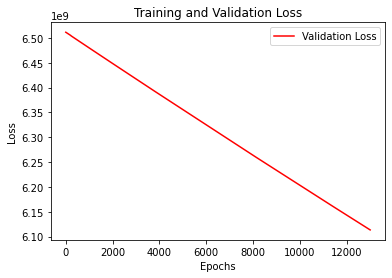

In [186]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)
#plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [139]:
sensores2.loc[CUT_DATE-timedelta(weeks=18*4):CUT_DATE-timedelta(weeks=19*4),:])


Timestamp('2018-09-30 00:00:00')

In [147]:
arribos

,time,lobster,week,month,year
0,2005-09-04,0.0,35,9,2005
1,2005-09-11,0.0,36,9,2005
2,2005-09-18,0.0,37,9,2005
3,2005-09-25,0.0,38,9,2005
4,2005-10-02,4879.0,39,10,2005
...,...,...,...,...,...
744,2019-12-08,8086.0,49,12,2019
745,2019-12-15,3803.0,50,12,2019
746,2019-12-22,4591.0,51,12,2019
747,2019-12-29,5210.0,52,12,2019


In [188]:
!pip install prophet

     |████████████████████████████████| 6.8 MB 2.3 MB/s            
     |████████████████████████████████| 514 kB 9.3 MB/s            
     |████████████████████████████████| 47 kB 7.8 MB/s             
     |████████████████████████████████| 83 kB 2.3 MB/s             
     |████████████████████████████████| 5.8 MB 10.6 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.4 MB 10.5 MB/s            
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732017 sha256=47e7f49b0e9bc051095a43317bf7cbd8b4449acae8f3c3fd12a7e7287dfb5993
  Stored in directory: /Users/ulisesquevedo/Library/Caches/pip/wheels/c2/3a/3d/11734e652782d3f823a08aae1c452e887eb16349750cca3f8a
Successfully built pymeeus
You should consider upgrading via the '/Users/ulisesquevedo/.pyenv/versions/3.8.8/envs/base/bin/python3.8 -m pip install --upgrade pip' command.


In [195]:
arribos_proph = arribos.loc[:,["time","lobster"]]

In [197]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [207]:
m = Prophet()
arribos_proph.rename(columns={"time":"ds","lobster":"y"},inplace=True)
m.fit(arribos_proph)

12:00:44 - cmdstanpy - INFO - Chain [1] start processing
12:00:44 - cmdstanpy - INFO - Chain [1] done processing


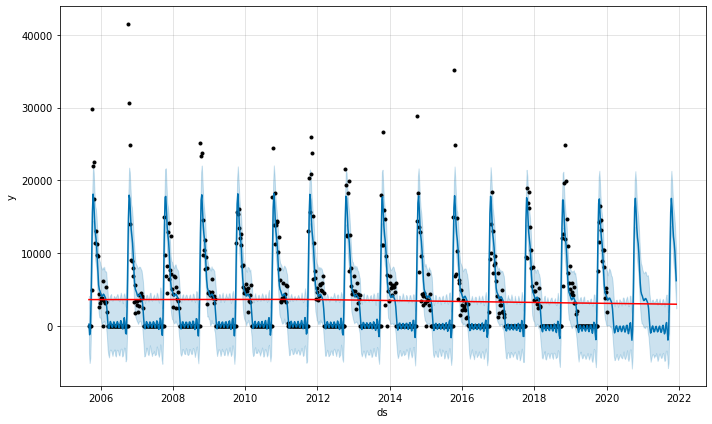

In [211]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

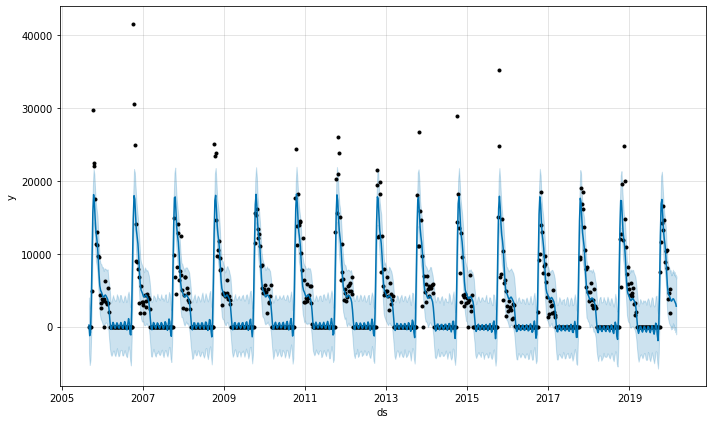

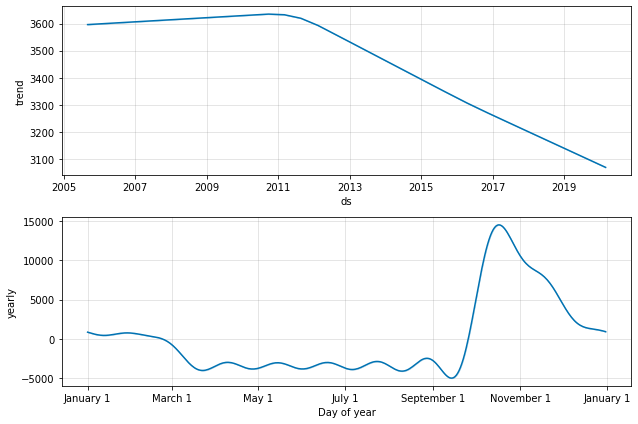

In [204]:
fig1=m.plot(forecast)

fig2 =m.plot_components(forecast)

In [206]:
forecast[["yhat_lower","yhat_upper","yhat"]]

,yhat_lower,yhat_upper,yhat
0,-3513.265798,4001.312644,212.441681
1,-5267.701008,2485.305790,-1238.218475
2,-4571.869709,3089.287896,-823.244263
3,-839.471155,7041.597286,3171.090996
4,5833.820736,13514.119664,9722.484043
...,...,...,...
796,-251.031262,6917.484831,3128.215940
797,-741.853647,6897.985679,3065.041233
798,-642.879862,6916.822114,2992.082643
799,-1056.759891,6590.303419,2908.205496
